In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [3]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "relu")
    caches.append(cache)
    
    return AL, caches

In [4]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [5]:
def linear_forward(A, W, b):
    Z = W.dot(A) + b
    cache = (A, W, b) 
    
    return Z, cache

In [6]:
def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    
    return A, cache

In [7]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    #cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = (1/2) * np.sum(np.power(AL - Y, 2))
    cost = np.squeeze(cost)
    
    return cost

In [8]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "relu")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [9]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [10]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [11]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0    
    
    return dZ

In [12]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [13]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches =  L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [14]:
train_x = np.zeros([3, 100])
train_x[0, :] = np.arange(0, 2 * np.pi, 2 * np.pi/100) + 2 * np.pi/100
train_x[1, :] = np.arange(0, 2 * np.pi, 2 * np.pi/100) + 2 * np.pi/100
train_x[2, :] = np.arange(-1, 1, 2/100)
train_y = (np.sin(train_x[0, :]) + np.cos(train_x[1, :]) + train_x[2, :]).reshape(1, -1)

print(train_x.shape)
print(train_y.shape)

(3, 100)
(1, 100)


<ipython-input-8-132c1de21a76>:6: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


Cost after iteration 0: 41.333560
Cost after iteration 1000: 35.706716
Cost after iteration 2000: 35.242074
Cost after iteration 3000: 33.332819
Cost after iteration 4000: 33.230790
Cost after iteration 5000: 35.849484
Cost after iteration 6000: 35.849484
Cost after iteration 7000: 35.849484
Cost after iteration 8000: 35.849484
Cost after iteration 9000: 35.849484


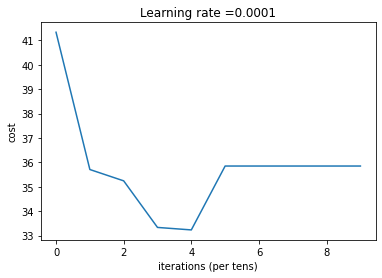

In [28]:
layers_dims = [train_x.shape[0], 3, 3, 1]
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.001, num_iterations = 10000, print_cost = True)

In [24]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    print("predictions: " + str(probas))
    print("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return probas

In [25]:
pred_train = predict(train_x, train_y, parameters)

predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
true labels: [[ 0.06081725  0.13744793  0.20966857  0.27727305  0.34007351  0.39790104
   0.45060634  0.49806035  0.54015472  0.57680225  0.60793723  0.63351573
   0.65351573  0.66793723  0.67680225  0.68015472  0.67806035  0.67060634
   0.65790104  0.64007351  0.61727305  0.58966857  0.55744793  0.52081725
   0.48        0.43523621  0.38678147  0.33490594  0.27989327  0.22203952
   0.16165193  0.09904776  0.03455301 -0.03149887 -0.09876826 -0.16691075
  -0.23557848 -0.30442152 -0.37308925 -0.44123174 -0.50850113 -0.57455301
  -0.63904776 -0.70165193 -0.76203952 -0.81989327 -0.87490594 -0.92678147
  -0.97523621 -1.02       -1.06081725 -1.09744793 -1.12966857 -1.15727

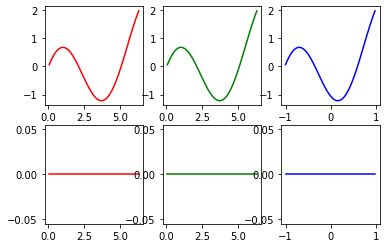

In [26]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(train_x[0, :], train_y[0], 'red')
axs[0, 1].plot(train_x[1, :], train_y[0], 'green')
axs[0, 2].plot(train_x[2, :], train_y[0], 'blue')
axs[1, 0].plot(train_x[0, :], pred_train[0], 'red')
axs[1, 1].plot(train_x[1, :], pred_train[0], 'green')
axs[1, 2].plot(train_x[2, :], pred_train[0], 'blue')
plt.show()